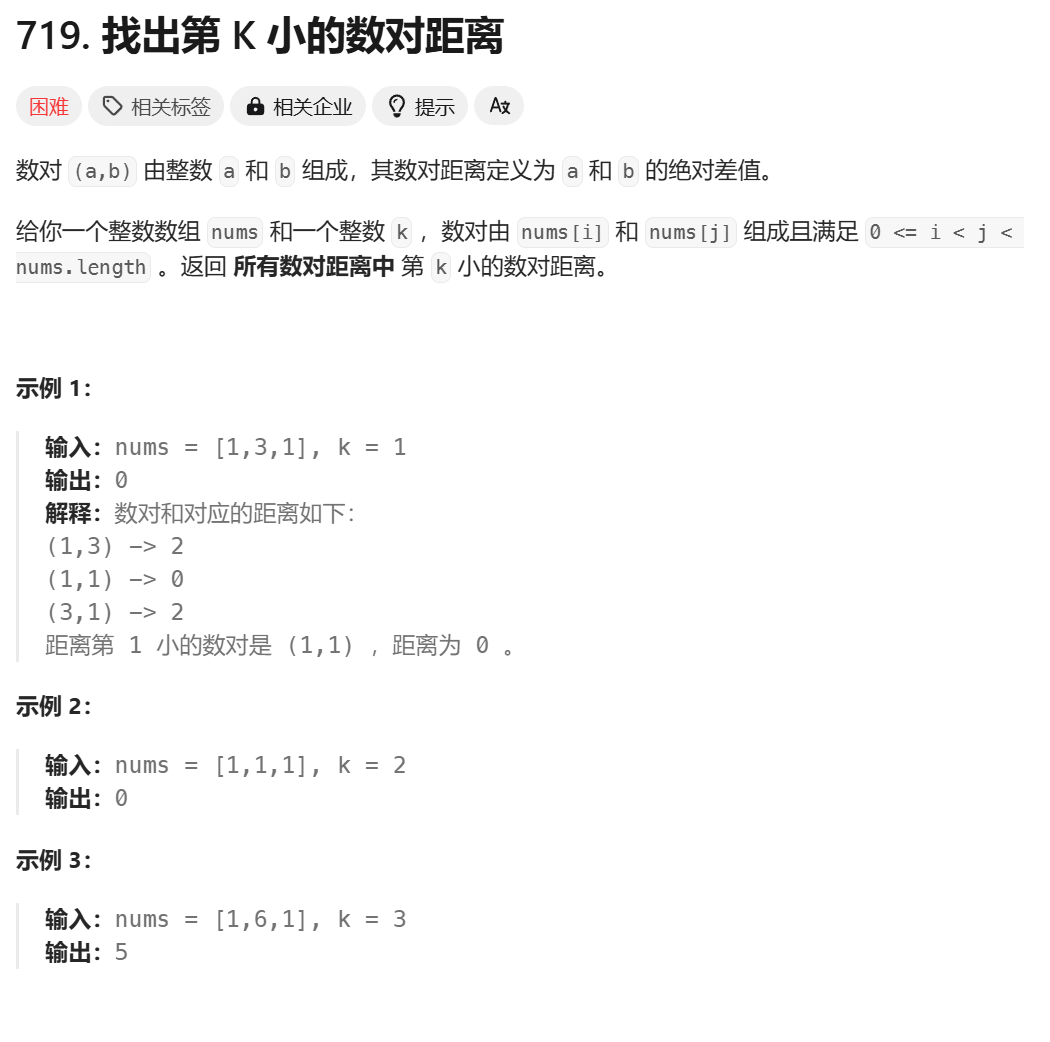

In [3]:
from typing import List

class Solution:
    def smallestDistancePair(self, nums: List[int], k: int) -> int:
        res = []
        for i in range(len(nums)):
            for j in range(i + 1, len(nums)):
                res.append(abs(nums[j] - nums[i]))
        res = sorted(res)
        return res[k - 1]

a = Solution()
a.smallestDistancePair([1,3,1], 1)

0

## 思路
- 先排序
- 然后直接使用二分查找，但是查找的是距离？
  - 就是没有一个数组来给你查找
  - 直接找两个数字之间的一个数字（距离）
  - 对，我们要找到mid是距离
    - （可能的）最小值0 与最大值距离也就是nums[-1] - nums[0]
  - 然后统计在原数组中我们小于mid距离的数对
  - 如果数对数太多大于k,right=mid -1 ....
- 怎么统计数对的多少？
- 一个指针遍历，然后找能与它配对的小于mid距离的数对数目 只向前看防止重复，向前看需要一个left 来计算距离
  - left right统一放在一开始
  - 然后right从1开始遍历到结尾
  - 如果 nums[right - left] 大于我们要找的距离，那么就left += 1 因为后面right都是要加一的 后面距离肯定更大 不用置零left
  - 相当于一个可变大小的滑动窗口 这个窗口大小取决于当前窗口极限距离
  - 如果小于等于直接统计right - left（因为我们统计的是能与right 组成的数对数 而right是遍历了的）

In [2]:
from typing import List

class Solution:
    def smallestDistancePair(self, nums: List[int], k: int) -> int:
        def sliding(desination): # 来找小于当前目标mid 的所有数对
            count, left = 0,   # 函数内部的变量默认只有内部可用 对外部的同名变量没有影响
            for right in range(len(nums)):  # right 遍历来找所有能和它配对的小于mid 的数对
                while nums[right] - nums[left] > desination:
                    left += 1          # 每次循环不用将left 置0 ， 因为之前的right -left 匹配对 的距离肯定小于等于后面的right与当前left的距离
                count += right - left # 统计与right 结合的数对数目
            return count 
        
        nums.sort()
        left, right = 0, nums[-1] - nums[0]  # 二分查找距离
        while left < right:
            mid = (left + right) // 2
            merber = sliding(mid)
            if merber >= k:
                right = mid
            else:
                left = mid + 1
        return left
    
a = Solution()
a.smallestDistancePair([1,3,1],3)

2